<a href="https://colab.research.google.com/github/vishwajeet-hogale/Amazon-scrapper/blob/main/SentiMentIPOZomatoIPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip3 install newspaper3k
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 37.3 MB/s 


In [24]:
import pandas as pd
from newspaper import Article
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
links1 =['https://www.bloombergquint.com/business/zomato-ipo-pandemic-gave-a-boost-will-it-last','https://www.indmoney.com/articles/zomato-ipo-zomato-ipo-date-price-lot-size-review-more-details','https://www.thehindubusinessline.com/markets/stock-markets/zomato-ipo-will-open-floodgates-for-other-start-ups-bikhchandani/article35514248.ece','https://www.financialexpress.com/market/zomato-stock-market-live-ipo-share-listing-23-july-2021-online-food-ordering-food-tech-unicorn-bse-nse-dalal-street-grey-market-premium/2296040/','https://www.moneycontrol.com/news/business/ipo/zomato-ipo-listing-food-delivery-giant-sees-strong-stock-market-debut-lists-at-rs-116-7210471.html','https://economictimes.indiatimes.com/markets/ipos/fpos/zomato-lists-at-53-premium-over-issue-price-enters-elite-club-of-top-100-cos-by-market-value/articleshow/84666820.cms','https://www.moneycontrol.com/news/business/markets/zomato-ipo-listing-retail-investors-gained-but-info-edge-and-founder-deepinder-goyal-made-a-fortune-7213751.html','https://www.ndtv.com/india-news/deepinder-goyal-stake-in-zomato-is-now-worth-650-million-2493338','https://www.bloombergquint.com/business/zomato-ipo-co-founders-senior-executives-a-badminton-player-among-zomato-millionaires','https://economictimes.indiatimes.com/markets/ipos/fpos/zomato-listing-on-friday-grey-market-premium-climbs-to-35/articleshow/84629841.cms','https://indianexpress.com/article/business/bumper-debut-for-zomato-m-cap-races-past-rs-1-lakh-cr-7418500/']

body =[]
for ur in links1 :
    article = Article(ur)
    article.download()
    article.parse()
    body.append(article.text)
df = pd.DataFrame({"Text":body})


 


In [6]:
df

Text
0   The complete lockdown to contain the first wav...
1   Zomato is set to raise up to Rs 9,375 crore vi...
2   After witnessing a stellar debut on the stock ...
3   Zomato ended the initial day of trade on the s...
4   live bse live\n\nnse live Volume Todays L/H Mo...
5   NEW DELHI: Zomato scripted history on Friday b...
6   live bse live\n\nnse live Volume Todays L/H Mo...
7   Deepinder Goyal is the founder of Zomato.\n\nA...
8   Co-founders to top executives of Zomato Ltd. w...
9   New Delhi: Food delivery platform Zomato is li...
10  At the NSE, it got listed at Rs 116, registeri...

In [9]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download("stopwords")
# print(stopwords.words('english'))
# stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [17]:

stopwords = set(STOPWORDS) 

def WordCloudForSentiments (corpus, title):
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey',
                          stopwords = stopwords,  min_font_size = 10).generate(corpus)

    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud:  ' + title)
    plt.tight_layout(pad = 0) 

    plt.show()

In [18]:
Corpus = ''
for article in df['Text']:
    Corpus +=  (article + ' ') 

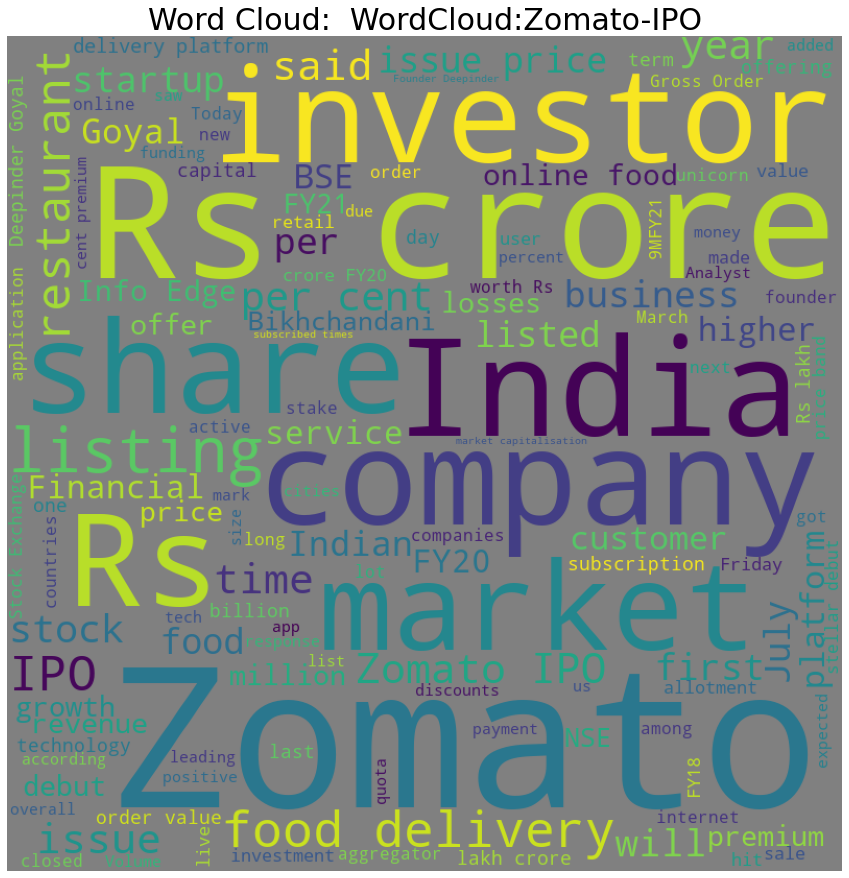

In [19]:
WordCloudForSentiments( ''.join(Corpus),'WordCloud:Zomato-IPO' )

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
for sentence in df['Text']:
    if len(sentence)==0:
      continue
    sentiment_dict = analyzer.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

Overall sentiment dictionary is :  {'neg': 0.055, 'neu': 0.82, 'pos': 0.125, 'compound': 0.968}
sentence was rated as  5.5 % Negative
sentence was rated as  82.0 % Neutral
sentence was rated as  12.5 % Positive
Overall sentiment dictionary is :  {'neg': 0.047, 'neu': 0.863, 'pos': 0.09, 'compound': 0.9953}
sentence was rated as  4.7 % Negative
sentence was rated as  86.3 % Neutral
sentence was rated as  9.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.015, 'neu': 0.936, 'pos': 0.05, 'compound': 0.9001}
sentence was rated as  1.5 % Negative
sentence was rated as  93.60000000000001 % Neutral
sentence was rated as  5.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.9524}
sentence was rated as  0.0 % Negative
sentence was rated as  91.2 % Neutral
sentence was rated as  8.799999999999999 % Positive
Overall sentiment dictionary is :  {'neg': 0.024, 'neu': 0.865, 'pos': 0.111, 'compound': 0.9974}
sentence was rated as  2.4 % Neg

In [38]:
cat = {0:'negative',2:'positive',1:'neutral'}
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def SentimentAnlysis(sentence):
    sentAnalyzer = SentimentIntensityAnalyzer() 
    sentDict = sentAnalyzer.polarity_scores(sentence)
    all_scores = list(sentDict.values())[0:3]
    print(all_scores)
    val = max(all_scores)
    index = all_scores.index(val)
    print(val,index)
    return cat[index]

In [39]:
from tqdm import tqdm
sentiment = []

for article in  tqdm (df['Text']):
    sentiment.append(SentimentAnlysis(article))

100%|██████████| 11/11 [00:00<00:00, 49.36it/s]

[0.073, 0.833, 0.094]
0.833 1
[0.047, 0.862, 0.091]
0.862 1
[0.015, 0.934, 0.051]
0.934 1
[0.0, 0.91, 0.09]
0.91 1
[0.02, 0.861, 0.119]
0.861 1
[0.015, 0.875, 0.11]
0.875 1
[0.008, 0.918, 0.074]
0.918 1
[0.028, 0.872, 0.099]
0.872 1
[0.0, 0.887, 0.113]
0.887 1
[0.008, 0.899, 0.093]
0.899 1
[0.0, 0.891, 0.109]
0.891 1


In [40]:
df['Sentiments'] = sentiment

In [41]:
df

Text Sentiments
0   The complete lockdown to contain the first wav...    neutral
1   Zomato is set to raise up to Rs 9,375 crore vi...    neutral
2   After witnessing a stellar debut on the stock ...    neutral
3   Zomato ended the initial day of trade on the s...    neutral
4   live bse live\n\nnse live Volume Todays L/H Mo...    neutral
5   NEW DELHI: Zomato scripted history on Friday b...    neutral
6   live bse live\n\nnse live Volume Todays L/H Mo...    neutral
7   Deepinder Goyal is the founder of Zomato.\n\nA...    neutral
8   Co-founders to top executives of Zomato Ltd. w...    neutral
9   New Delhi: Food delivery platform Zomato is li...    neutral
10  At the NSE, it got listed at Rs 116, registeri...    neutral

Text(0.5, 1.0, 'Twitter Sentiments on Zomato IPO')

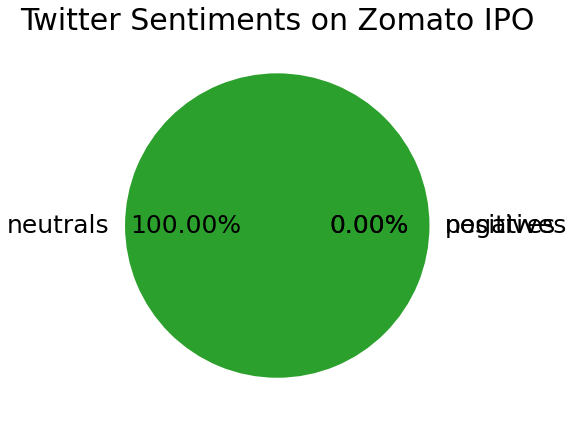

In [42]:
numPostives = len(df[df['Sentiments'] == 'positive'])
numNegatives = len(df[df['Sentiments'] == 'negative'])
numNeutrals  = len(df[df['Sentiments'] == 'neutral'])

plt.figure(figsize = (7, 7))
plt.pie([numPostives, numNegatives, numNeutrals], labels = ['positives', 'negatives', 'neutrals'], autopct='%1.2f%%')
plt.title('Twitter Sentiments on Zomato IPO')